## Crime data visualization across diffrent states in India

As a part of digital India initiative, the Indian government designed [a new website](https://data.gov.in/) and uploaded a bunch of quite interesting datasets. I'm particularly excited about this because I have recently learned how to program in R (Coursera Data Science Specialization). R has some powerful packages (thanks to *Hadley Wickham* -- the 'R'ockstar) that can do data cleaning, manipulation, and visualization. This post is mainly inspired by another [blog article](http://rud.is/b/2016/02/14/making-faceted-heatmaps-with-ggplot2/). I have a dataset in my mind that I wanted to explore, and this article gave me enough confidence to start producing some nice visualizations.

This data [persons arrested for crimes against women](https://data.gov.in/catalog/persons-arrested-under-crime-against-women) is particularly interesting because we represent everything that we have in here using beautiful faceted heat maps. And, that also tells us some lessons on what states are notorious for crimes against women. You might have heard about the deluge of data that we are living in this information age, and this is what excites me about bringing insights from data.

## Cleaning the data

The website provided with moderately clean data, it is by no means perfect. A typical problem that you would find in these datasets is that we want something to be recorded as an observation in a row, but it ends up in a column. Hadley developed an excellent package that can *melt* the data, and make it an observation. I'm not going into the data cleaning part in excruciating detail, but I'm going to upload my notebook, so you can have a look at it. For now, I'm providing a cleaned dataset in the repository so that you can start doing exciting things straight away.


We read the data, but don't forget setting stringsasFactors.

In [53]:
df <- read.csv("data_tidy.csv", stringsAsFactors = FALSE)

In [54]:
str(df)

'data.frame':	3888 obs. of  4 variables:
 $ STATE.UT  : chr  "Andhra Pradesh" "Arunachal Pradesh" "Assam" "Bihar" ...
 $ CRIME.HEAD: chr  "RAPE" "RAPE" "RAPE" "RAPE" ...
 $ number    : int  871 33 817 888 959 12 286 398 124 169 ...
 $ year      : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...


Let's see what we actually have here.

In [57]:
head(df)

,STATE.UT,CRIME.HEAD,number,year
1,Andhra Pradesh,RAPE,871,2001
2,Arunachal Pradesh,RAPE,33,2001
3,Assam,RAPE,817,2001
4,Bihar,RAPE,888,2001
5,Chhattisgarh,RAPE,959,2001
6,Goa,RAPE,12,2001


The government divided crimes into various types, let's explore what they are.

In [58]:
new <- as.factor(df$CRIME.HEAD)
levels(new)

[1] "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY"
[2] "CRUELTY BY HUSBAND OR RELATIVES"                    
[3] "DOWRY DEATH"                                        
[4] "IMMORAL TRAFFIC(PREVENTION)ACT"                     
[5] "INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT"    
[6] "INSULT TO THE MODESTY OF WOMEN"                     
[7] "KIDNAPPING & ABDUCTION"                             
[8] "RAPE"                                               
[9] "TOTAL CRIMES AGAINST WOMEN"

Let's covert year as a factor, it is going to help us in visualization.

In [60]:
df$year <- as.factor(df$year)

Now, let us load some packages that will help us in doing the visualization.

In [5]:
require(dplyr)
require(ggplot2)
library(gridExtra)  
library(ggthemes)
library(viridis)  
library(scales)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2


I'm dividing the original cleaned dataset in to different data frames according to their crime type, this is going to help us in understanding the prevalence of various crimes across various states in the country.

In [61]:
df_rape <- filter(df, CRIME.HEAD == "RAPE")
df_assault <- filter(df, CRIME.HEAD == "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY")
df_cruelty <- filter(df, CRIME.HEAD == "CRUELTY BY HUSBAND OR RELATIVES")
df_dowry <- filter(df, CRIME.HEAD == "DOWRY DEATH")
df_it <- filter(df, CRIME.HEAD == "IMMORAL TRAFFIC(PREVENTION)ACT")
df_pw <- filter(df, CRIME.HEAD == "INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT")
df_insult <- filter(df, CRIME.HEAD == "INSULT TO THE MODESTY OF WOMEN")
df_ka <- filter(df, CRIME.HEAD == "KIDNAPPING & ABDUCTION")
df_total <- filter(df, CRIME.HEAD == "TOTAL CRIMES AGAINST WOMEN")

## Visualizations

I'm assuming some familiarity with ggplot, you can look at the original tutorial for better explanations to the code. There is one minor glitch in this data, the dataset also contains a 'total' variable which adds all the crimes of individual states. I had to remove it because when we do a heatmap, if one variable is too large, it is going to take all the weight. 

(I had orignally planned to write a plot function, but that wouldn't generalize to this data because the 'total' variable is taking different names under different crimes.)

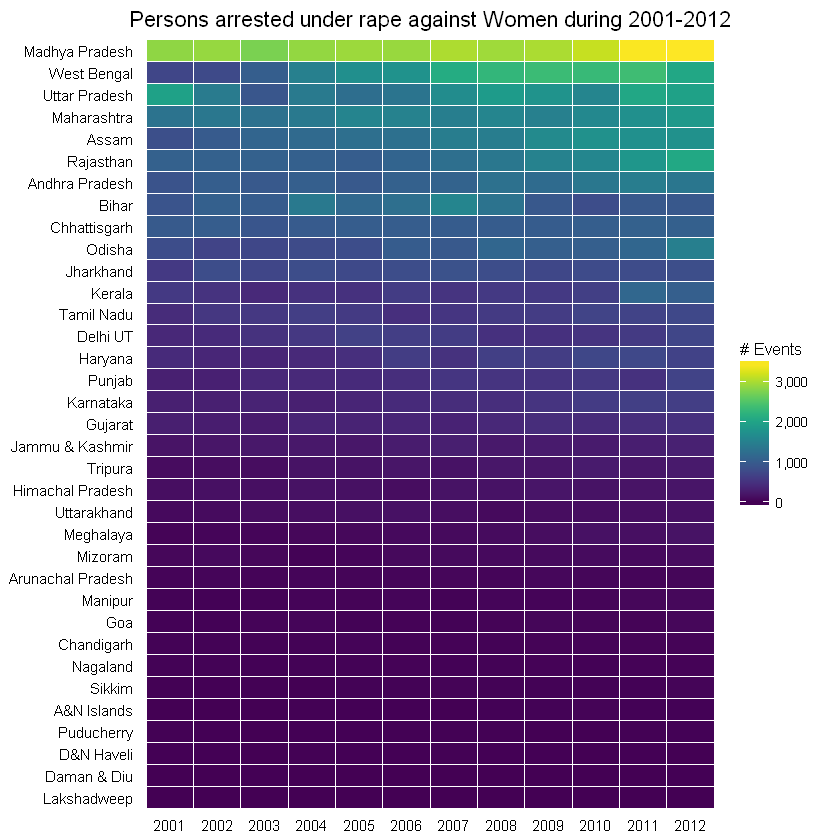

In [62]:
df_rape$CRIME.HEAD <- NULL
df_rape <- droplevels( df_rape[-which(df_rape$STATE.UT == "All India"), ] )
df_rape<- df_rape%>%
                group_by(year) %>%
                    arrange(desc(number))
gg <- ggplot(df_rape, aes(x=year, y=reorder(STATE.UT, number), fill=number))
gg <- gg + geom_tile(color="white", size=0.1)
gg <- gg + scale_fill_viridis(name="# Events", label=comma)
gg <- gg + labs(x=NULL, y=NULL, title="Persons arrested under rape against Women during 2001-2012")
gg <- gg + theme_tufte(base_family="Helvetica")
gg <- gg + theme(plot.title=element_text(hjust=0.5))
gg <- gg + theme(axis.ticks=element_blank())
gg <- gg + theme(axis.text=element_text(size=9))
gg <- gg + theme(legend.title=element_text(size=10))
gg <- gg + theme(legend.text=element_text(size=8))
gg

It is quite amazing that ten lines of code produced a such a nice looking visualization that summarized the persons arrested for rape against women from 2001-2012 in all the states in India. I ordered the states in decreasing order. The top states show a consistency of crimes committed against women. One clear trend that I see here is that the state West Bengal has been moderately safe for women during 2001-2003, but after that there seems to be a consistent upward trend towards more rapes.

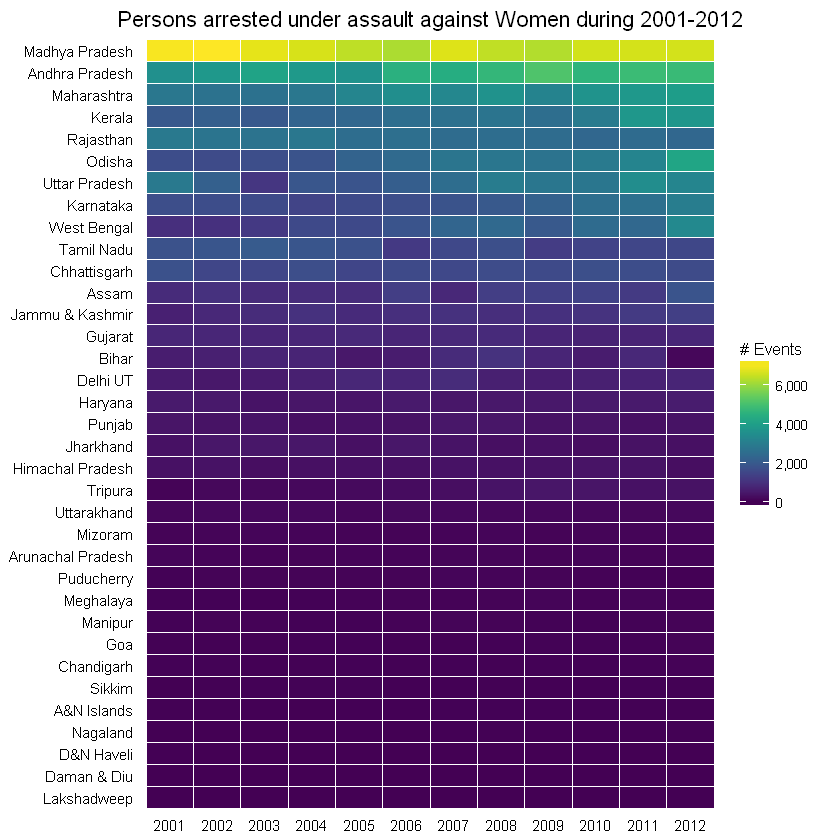

In [63]:
#df_assault <- filter(df, CRIME.HEAD == "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY")
df_assault$CRIME.HEAD <- NULL
df_assault <- droplevels( df_assault[-which(df_assault$STATE.UT == "All India"), ] )

gg <- ggplot(df_assault, aes(x=year, y=reorder(STATE.UT, number), fill=number))
gg <- gg + geom_tile(color="white", size=0.1)
gg <- gg + scale_fill_viridis(name="# Events", label=comma)
gg <- gg + labs(x=NULL, y=NULL, title="Persons arrested under assault against Women during 2001-2012")
gg <- gg + theme_tufte(base_family="Helvetica")
gg <- gg + theme(plot.title=element_text(hjust=0.5))
gg <- gg + theme(axis.ticks=element_blank())
gg <- gg + theme(axis.text=element_text(size=9))
gg <- gg + theme(legend.title=element_text(size=10))
gg <- gg + theme(legend.text=element_text(size=8))
gg
#ggsave(filename="assault.jpg", plot=gg)

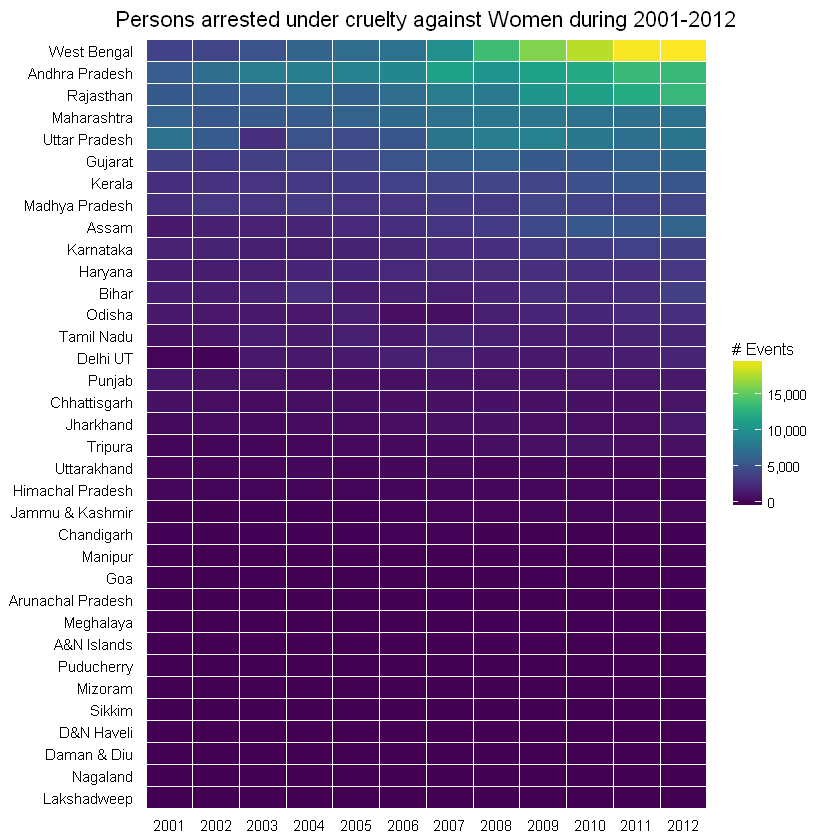

In [64]:
df_cruelty$CRIME.HEAD <- NULL
df_cruelty <- droplevels( df_cruelty[-which(df_cruelty$STATE.UT == "All India"), ] )
df_cruelty<- df_cruelty%>%
                group_by(year) %>%
                    arrange(desc(number))
gg <- ggplot(df_cruelty, aes(x=year, y=reorder(STATE.UT, number), fill=number))
gg <- gg + geom_tile(color="white", size=0.1)
gg <- gg + scale_fill_viridis(name="# Events", label=comma)
gg <- gg + labs(x=NULL, y=NULL, title="Persons arrested under cruelty against Women during 2001-2012")
gg <- gg + theme_tufte(base_family="Helvetica")
gg <- gg + theme(plot.title=element_text(hjust=0.5))
gg <- gg + theme(axis.ticks=element_blank())
gg <- gg + theme(axis.text=element_text(size=9))
gg <- gg + theme(legend.title=element_text(size=10))
gg <- gg + theme(legend.text=element_text(size=8))
gg

Again we see similar patterns emerge from West Bengal, Madya Pradesh and Andhra Pradesh.

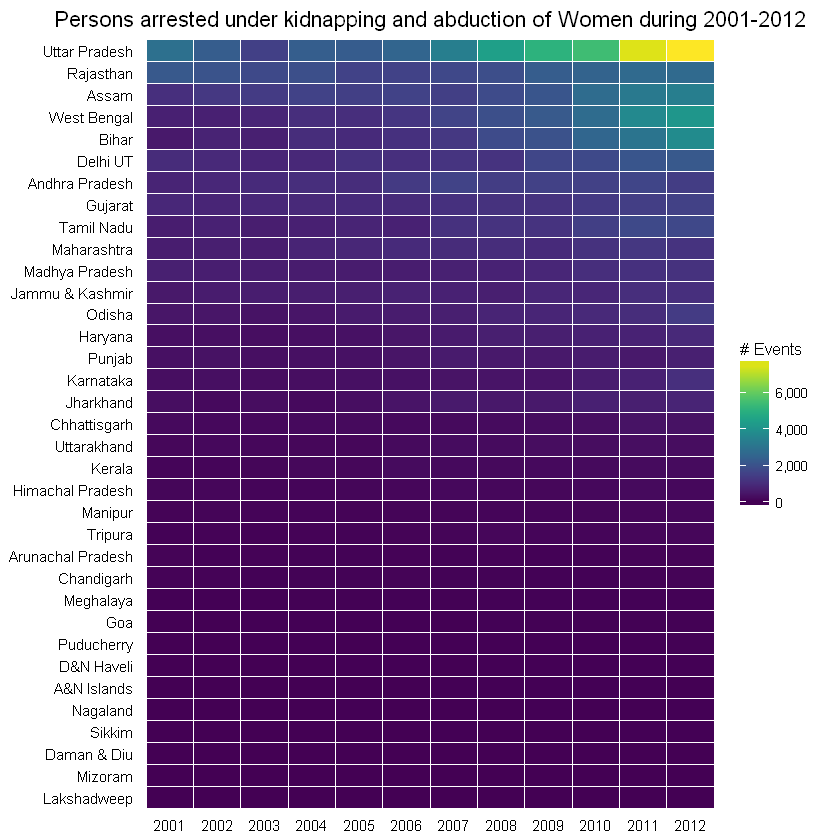

In [65]:
df_ka$CRIME.HEAD <- NULL
df_ka <- droplevels( df_ka[-which(df_ka$STATE.UT == "ALL INDIA K&A"), ] )
df_ka<- df_ka%>%
                group_by(year) %>%
                    arrange(desc(number))
gg <- ggplot(df_ka, aes(x=year, y=reorder(STATE.UT, number), fill=number))
gg <- gg + geom_tile(color="white", size=0.1)
gg <- gg + scale_fill_viridis(name="# Events", label=comma)
gg <- gg + labs(x=NULL, y=NULL, title="Persons arrested under kidnapping and abduction of Women during 2001-2012")
gg <- gg + theme_tufte(base_family="Helvetica")
gg <- gg + theme(plot.title=element_text(hjust=0.5))
gg <- gg + theme(axis.ticks=element_blank())
gg <- gg + theme(axis.text=element_text(size=9))
gg <- gg + theme(legend.title=element_text(size=10))
gg <- gg + theme(legend.text=element_text(size=8))
gg

Kidnapping and abduction is a serious issue, and Uttar Pradesh topped the list. In the last couple of years, we see a sudden increase in abductions of women from Uttar Pradesh.

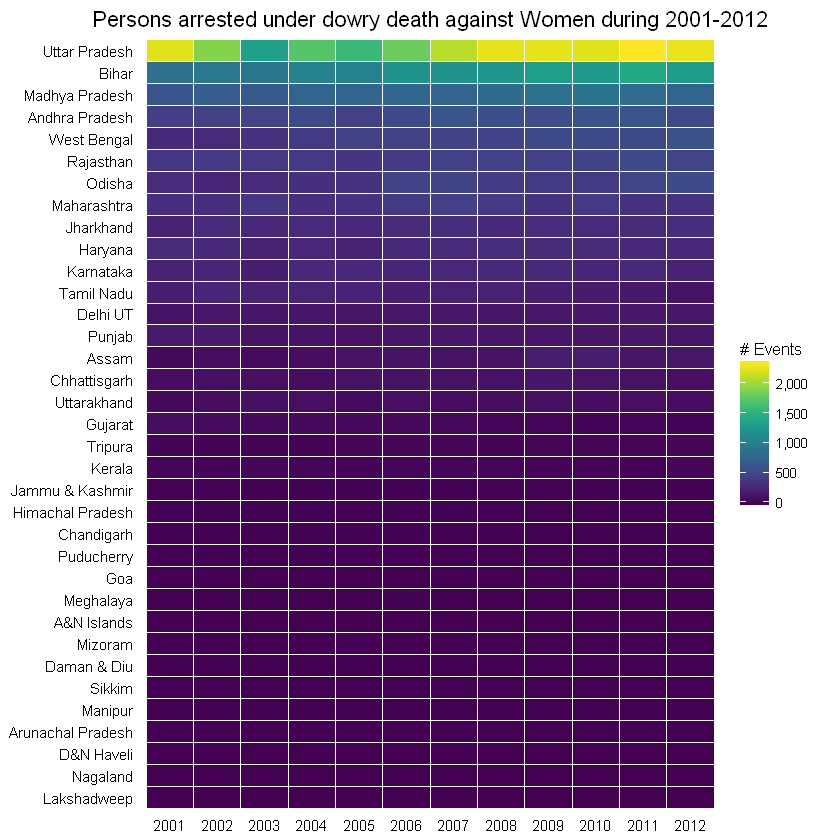

In [87]:
df_dowry$CRIME.HEAD <- NULL
df_dowry <- droplevels(df_dowry[-which(df_dowry$STATE.UT == "ALL INDIA "), ] )
df_dowry<- df_dowry%>%
                group_by(year) %>%
                    arrange(desc(number))
gg <- ggplot(df_dowry, aes(x=year, y=reorder(STATE.UT, number), fill=number))
gg <- gg + geom_tile(color="white", size=0.1)
gg <- gg + scale_fill_viridis(name="# Events", label=comma)
gg <- gg + labs(x=NULL, y=NULL, title="Persons arrested under dowry death against Women during 2001-2012")
gg <- gg + theme_tufte(base_family="Helvetica")
gg <- gg + theme(plot.title=element_text(hjust=0.5))
gg <- gg + theme(axis.ticks=element_blank())
gg <- gg + theme(axis.text=element_text(size=9))
gg <- gg + theme(legend.title=element_text(size=10))
gg <- gg + theme(legend.text=element_text(size=8))
gg

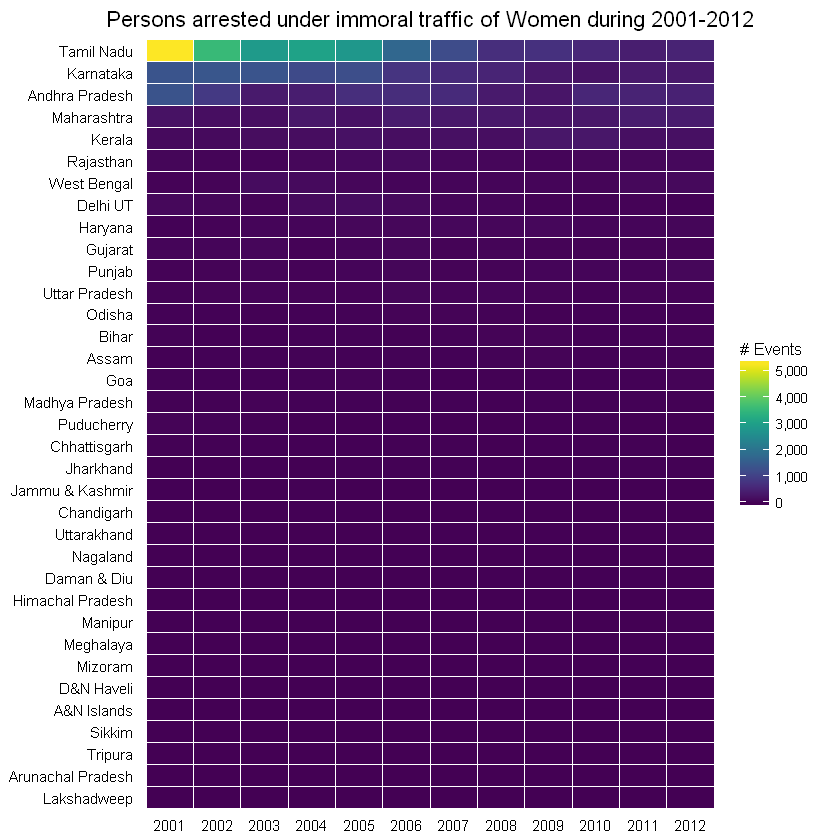

In [66]:
#df_it <- filter(df, CRIME.HEAD == "IMMORAL TRAFFIC(PREVENTION)ACT")
df_it$CRIME.HEAD <- NULL
df_it <- droplevels(df_it[-which(df_it$STATE.UT == "All India"), ] )
df_it<- df_it%>%
                group_by(year) %>%
                    arrange(desc(number))
gg <- ggplot(df_it, aes(x=year, y=reorder(STATE.UT, number), fill=number))
gg <- gg + geom_tile(color="white", size=0.1)
gg <- gg + scale_fill_viridis(name="# Events", label=comma)
gg <- gg + labs(x=NULL, y=NULL, title="Persons arrested under immoral traffic of Women during 2001-2012")
gg <- gg + theme_tufte(base_family="Helvetica")
gg <- gg + theme(plot.title=element_text(hjust=0.5))
gg <- gg + theme(axis.ticks=element_blank())
gg <- gg + theme(axis.text=element_text(size=9))
gg <- gg + theme(legend.title=element_text(size=10))
gg <- gg + theme(legend.text=element_text(size=8))
gg

We can see that most of the states were able to control immoral traffic of women from 2001-2012. 

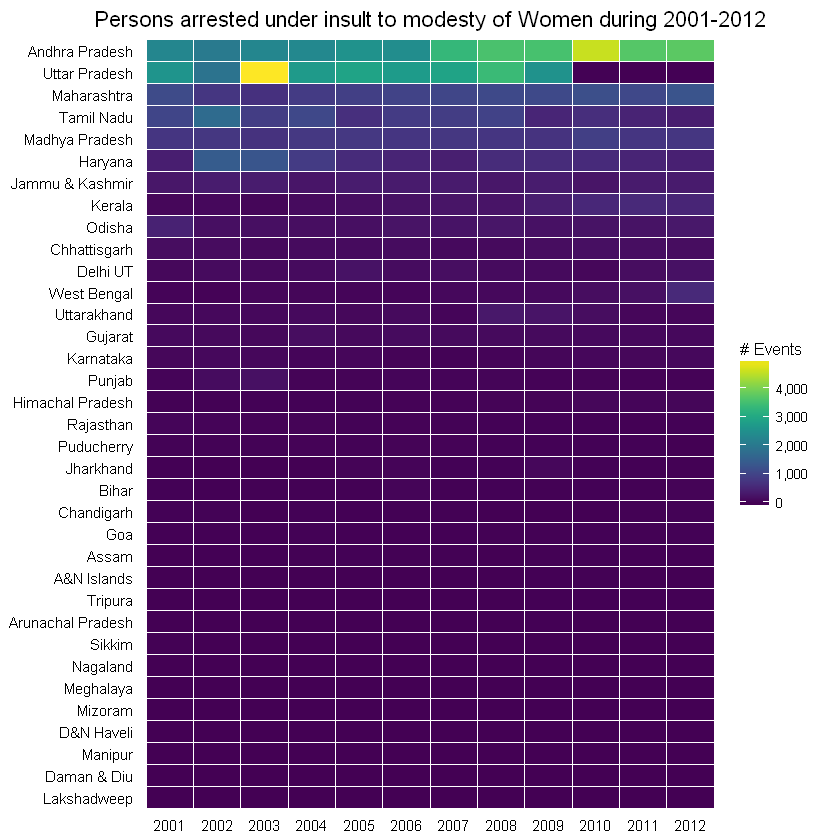

In [67]:
#df_insult <- filter(df, CRIME.HEAD == "INSULT TO THE MODESTY OF WOMEN")
df_insult$CRIME.HEAD <- NULL
df_insult<- droplevels(df_insult [-which(df_insult$STATE.UT == "All India"), ] )
df_insult<- df_insult %>%
                group_by(year) %>%
                    arrange(desc(number))
gg <- ggplot(df_insult, aes(x=year, y=reorder(STATE.UT, number), fill=number))
gg <- gg + geom_tile(color="white", size=0.1)
gg <- gg + scale_fill_viridis(name="# Events", label=comma)
gg <- gg + labs(x=NULL, y=NULL, title="Persons arrested under insult to modesty of Women during 2001-2012")
gg <- gg + theme_tufte(base_family="Helvetica")
gg <- gg + theme(plot.title=element_text(hjust=0.5))
gg <- gg + theme(axis.ticks=element_blank())
gg <- gg + theme(axis.text=element_text(size=9))
gg <- gg + theme(legend.title=element_text(size=10))
gg <- gg + theme(legend.text=element_text(size=8))
gg

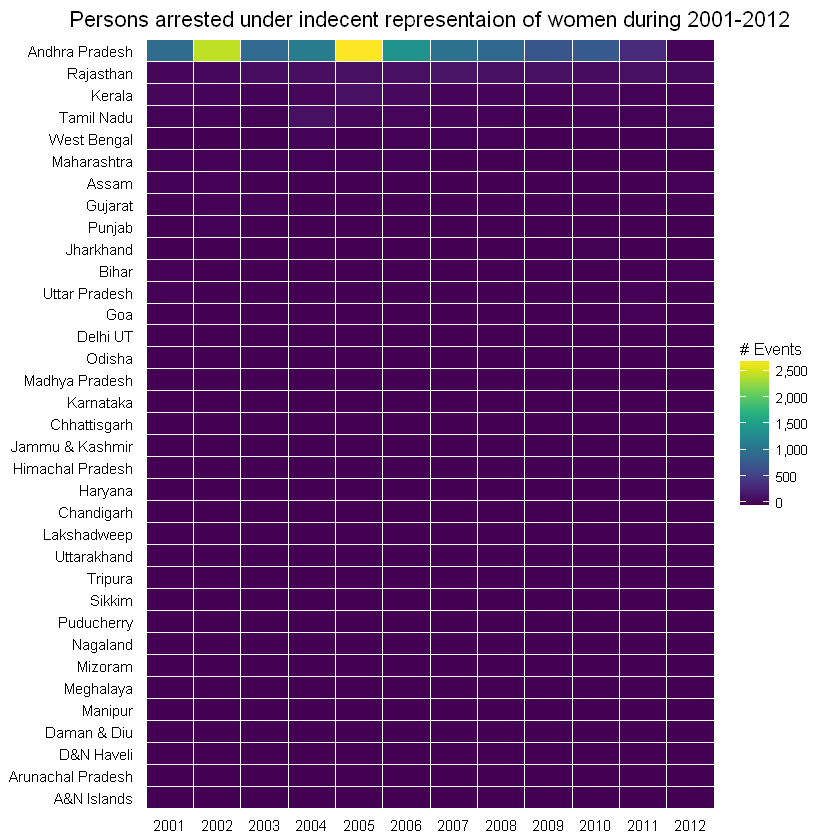

In [68]:
#df_pw <- filter(df, CRIME.HEAD == "INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT")
df_pw$CRIME.HEAD <- NULL
df_pw<- droplevels(df_pw [-which(df_pw$STATE.UT == "All India"), ] )
df_pw<- df_pw %>%
                group_by(year) %>%
                    arrange(desc(number))
gg <- ggplot(df_pw, aes(x=year, y=reorder(STATE.UT, number), fill=number))
gg <- gg + geom_tile(color="white", size=0.1)
gg <- gg + scale_fill_viridis(name="# Events", label=comma)
gg <- gg + labs(x=NULL, y=NULL, title="Persons arrested under indecent representaion of women during 2001-2012")
gg <- gg + theme_tufte(base_family="Helvetica")
gg <- gg + theme(plot.title=element_text(hjust=0.5))
gg <- gg + theme(axis.ticks=element_blank())
gg <- gg + theme(axis.text=element_text(size=9))
gg <- gg + theme(legend.title=element_text(size=10))
gg <- gg + theme(legend.text=element_text(size=8))
gg

We see no useful patterns in the last couple of cases, but we succeeded in visualizing a ton of information. I'm so much in love with the data provided in the open data website, and will be looking forward to explore more. One could use this information to make improved policies in particular states, and I'm looking forward to include some other features and build a predictive model that could predict a probability of risk, given a particular state.

## Clustering

The data suggests that we can divide the states in to two clusters, one cluster representing the high crime zone and other representing low crimes against women. We can do Hierarchical clustering to split the data, clustering is an unsupervised method, mainly useful in visualization. 

In [42]:
df <- read.csv("data_tidy.csv", stringsAsFactors = FALSE)

In [26]:
df_new <- df %>% group_by(STATE.UT) %>% summarise(total= sum(number))

In [39]:
df_new

,STATE.UT,total
1,A&N Islands,1161
2,Andhra Pradesh,534898
3,Arunachal Pradesh,4060
4,Assam,188272
5,Bihar,172647
6,Chandigarh,4350
7,Chhattisgarh,92538
8,D&N Haveli,509
9,Daman & Diu,258
10,Delhi UT,97988


In [52]:
d <- dist(df_new[,2])

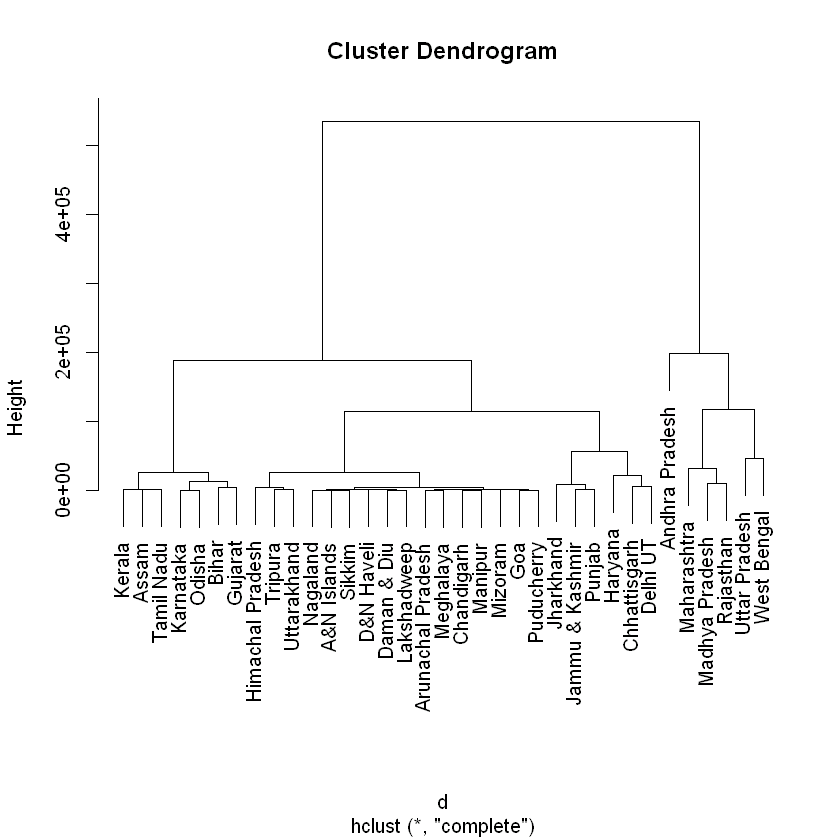

In [55]:
fit<- hclust(d)
plot(fit, labels = df_new$STATE.UT)